## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.rcParams['figure.figsize'] = (14, 10)
sns.set_style('whitegrid')
sns.set_palette('husl')

In [2]:
# Load the graph
G = nx.read_gml('../data/cyber_attacks_graph.gml')
print(f"Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Graph type: {'Directed' if G.is_directed() else 'Undirected'}")

Graph loaded: 217 nodes, 4332 edges
Graph type: Directed


## 2. Graph Visualization with Different Layouts

### 2.1 Kamada-Kawai Layout

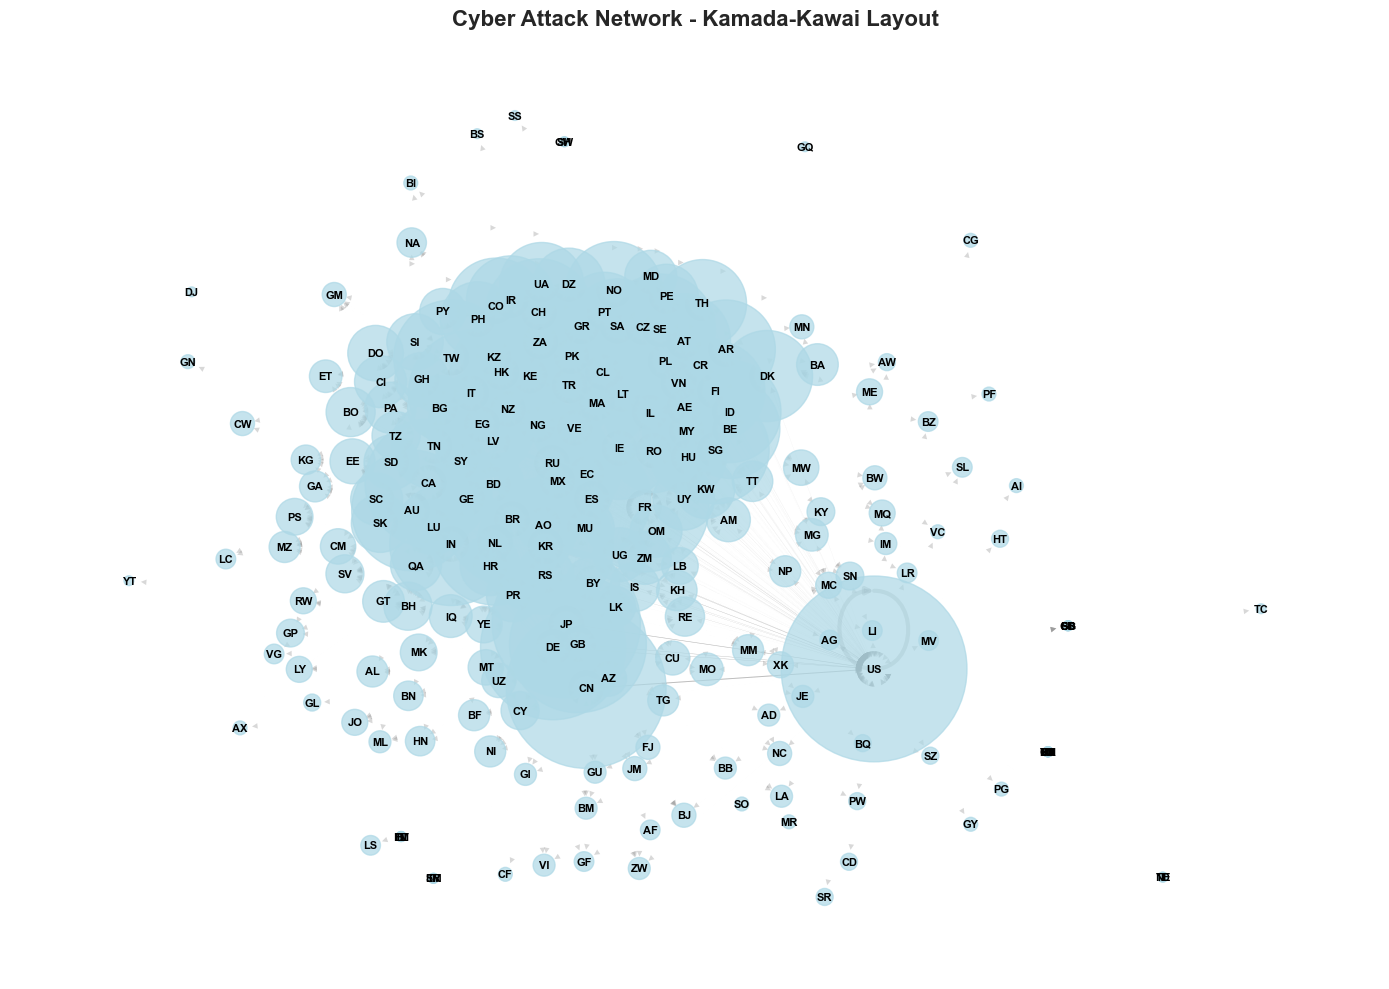

In [3]:
# Kamada-Kawai layout - minimizes energy function based on graph distances
plt.figure(figsize=(14, 10))
pos_kk = nx.kamada_kawai_layout(G)

# Node sizes based on degree
node_sizes = [G.degree(node) * 50 for node in G.nodes()]

# Edge weights for visualization
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

nx.draw_networkx_nodes(G, pos_kk, node_size=node_sizes, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos_kk, width=[w/max(weights)*3 for w in weights], 
                       alpha=0.3, edge_color='gray', arrows=True, arrowsize=10)
nx.draw_networkx_labels(G, pos_kk, font_size=8, font_weight='bold')

plt.title('Cyber Attack Network - Kamada-Kawai Layout', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

### 2.2 Shell Layout

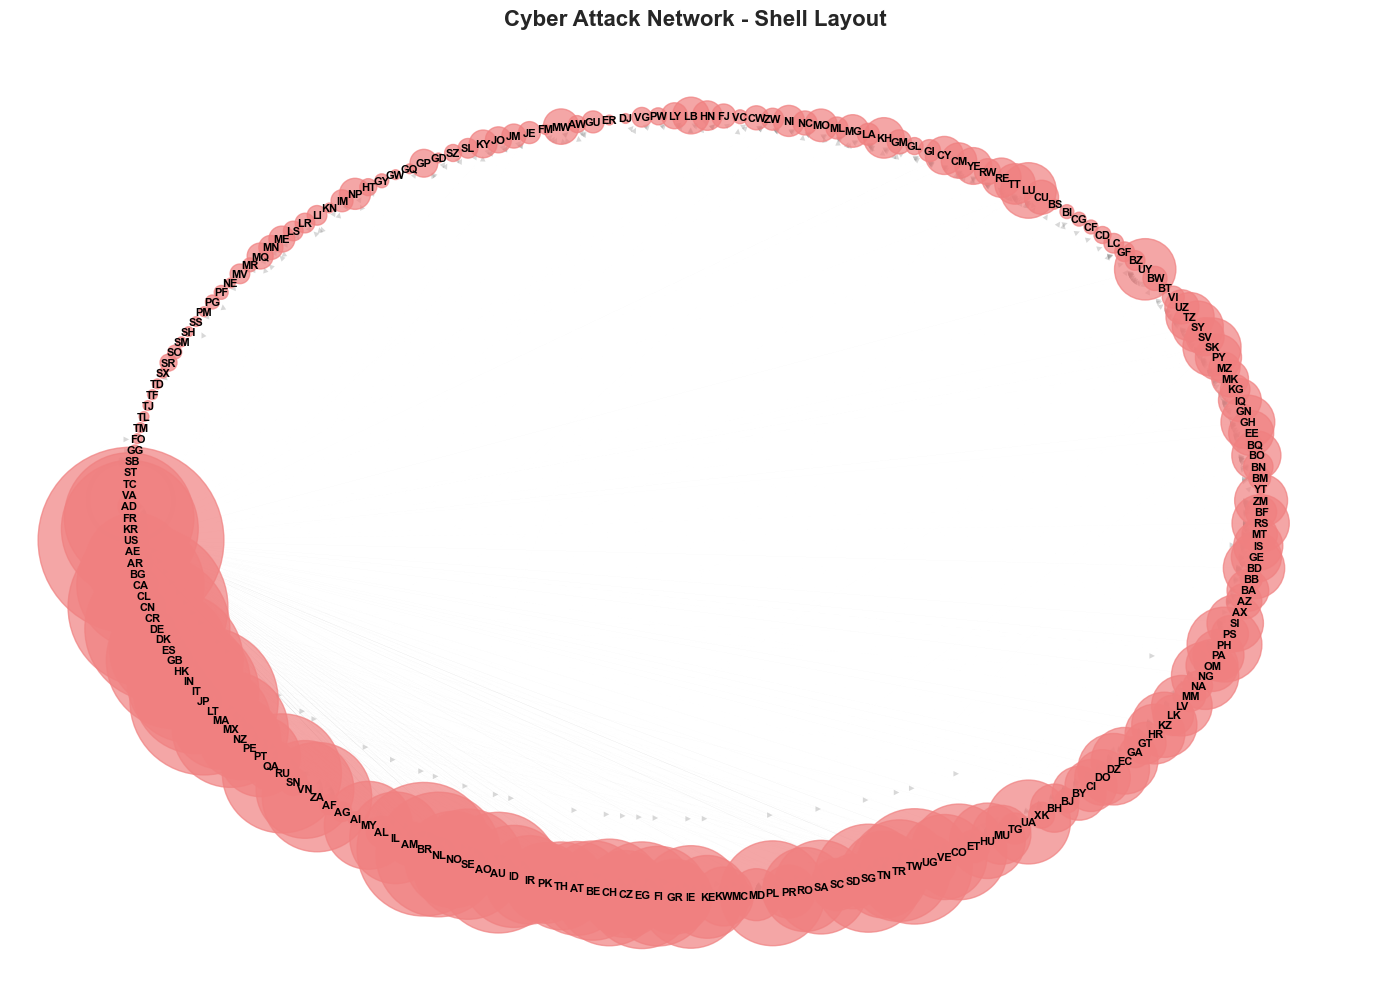

In [4]:
# Shell layout - nodes arranged in concentric circles
plt.figure(figsize=(14, 10))
pos_shell = nx.shell_layout(G)

nx.draw_networkx_nodes(G, pos_shell, node_size=node_sizes, node_color='lightcoral', alpha=0.7)
nx.draw_networkx_edges(G, pos_shell, width=[w/max(weights)*3 for w in weights], 
                       alpha=0.3, edge_color='gray', arrows=True, arrowsize=10)
nx.draw_networkx_labels(G, pos_shell, font_size=8, font_weight='bold')

plt.title('Cyber Attack Network - Shell Layout', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

### 2.3 Spiral Layout

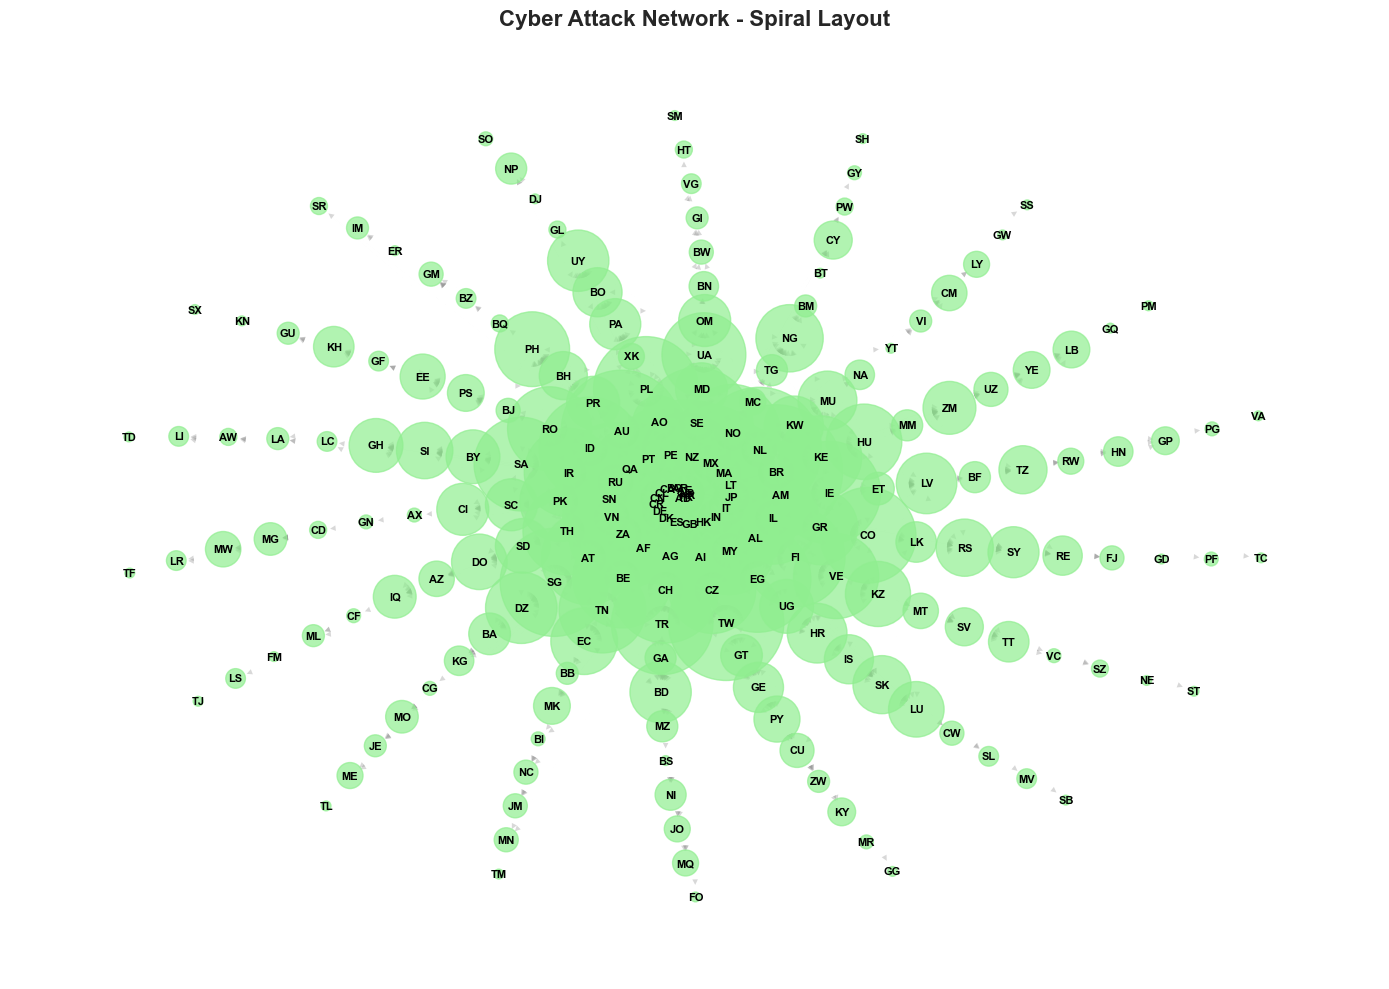

In [5]:
# Spiral layout - nodes arranged in a spiral pattern
plt.figure(figsize=(14, 10))
pos_spiral = nx.spiral_layout(G)

nx.draw_networkx_nodes(G, pos_spiral, node_size=node_sizes, node_color='lightgreen', alpha=0.7)
nx.draw_networkx_edges(G, pos_spiral, width=[w/max(weights)*3 for w in weights], 
                       alpha=0.3, edge_color='gray', arrows=True, arrowsize=10)
nx.draw_networkx_labels(G, pos_spiral, font_size=8, font_weight='bold')

plt.title('Cyber Attack Network - Spiral Layout', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Centrality Metrics Calculation

In [6]:
# Calculate centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight', max_iter=1000)
pagerank_centrality = nx.pagerank(G, weight='weight')

# Create DataFrame
centrality_df = pd.DataFrame({
    'country': list(G.nodes()),
    'degree': [degree_centrality[node] for node in G.nodes()],
    'betweenness': [betweenness_centrality[node] for node in G.nodes()],
    'eigenvector': [eigenvector_centrality[node] for node in G.nodes()],
    'pagerank': [pagerank_centrality[node] for node in G.nodes()]
})

centrality_df = centrality_df.sort_values('degree', ascending=False)
print("\nTop 10 countries by Degree Centrality:")
print(centrality_df.head(10))


Top 10 countries by Degree Centrality:
   country    degree  betweenness  eigenvector  pagerank
3       US  1.657407     0.151378     0.950212  0.349394
9       CN  1.226852     0.085304     0.210683  0.081248
18      JP  1.055556     0.043927     0.125343  0.045807
11      DE  1.009259     0.075559     0.081728  0.033565
2       KR  0.898148     0.035130     0.073619  0.026761
14      GB  0.898148     0.035558     0.083059  0.030081
37      BR  0.856481     0.037380     0.054004  0.019981
1       FR  0.805556     0.034106     0.052770  0.020135
7       CA  0.777778     0.026928     0.047749  0.019306
17      IT  0.754630     0.019933     0.038984  0.014370


## 4. Centrality Visualizations

### 4.1 Degree Centrality

/var/folders/5_/mnr70g2511s9w_v5w224k2x00000gn/T/ipykernel_8580/4015572977.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_degree, x='degree', y='country', palette='viridis')


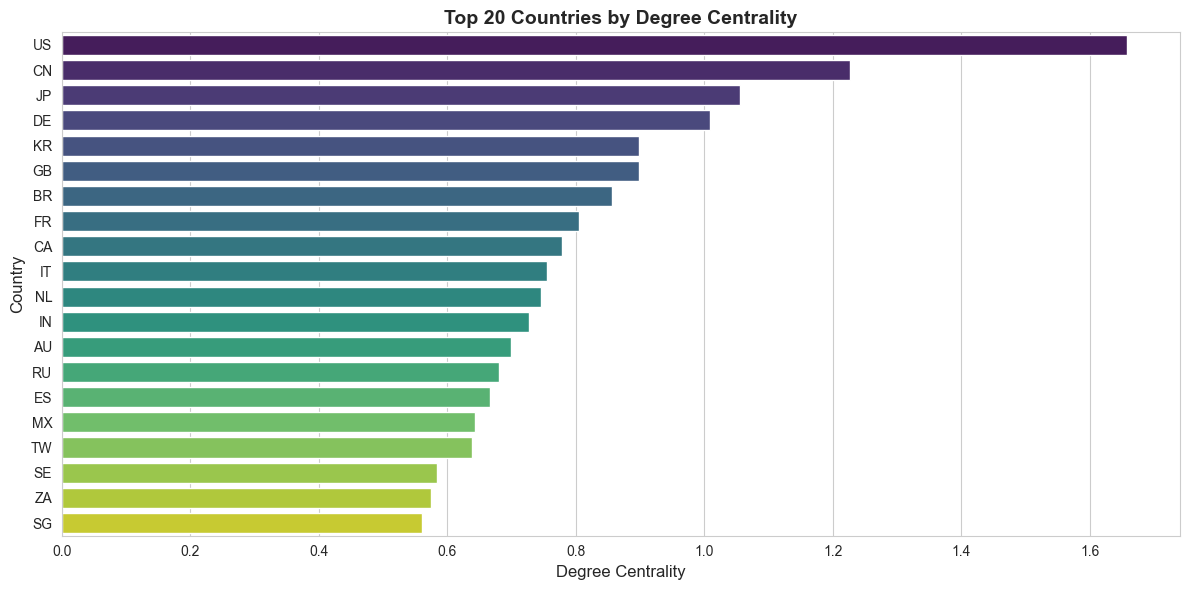

In [7]:
# Top 20 countries by Degree Centrality
plt.figure(figsize=(12, 6))
top_20_degree = centrality_df.nlargest(20, 'degree')
sns.barplot(data=top_20_degree, x='degree', y='country', palette='viridis')
plt.title('Top 20 Countries by Degree Centrality', fontsize=14, fontweight='bold')
plt.xlabel('Degree Centrality', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

### 4.2 Betweenness Centrality

/var/folders/5_/mnr70g2511s9w_v5w224k2x00000gn/T/ipykernel_8580/3348663613.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_betweenness, x='betweenness', y='country', palette='coolwarm')


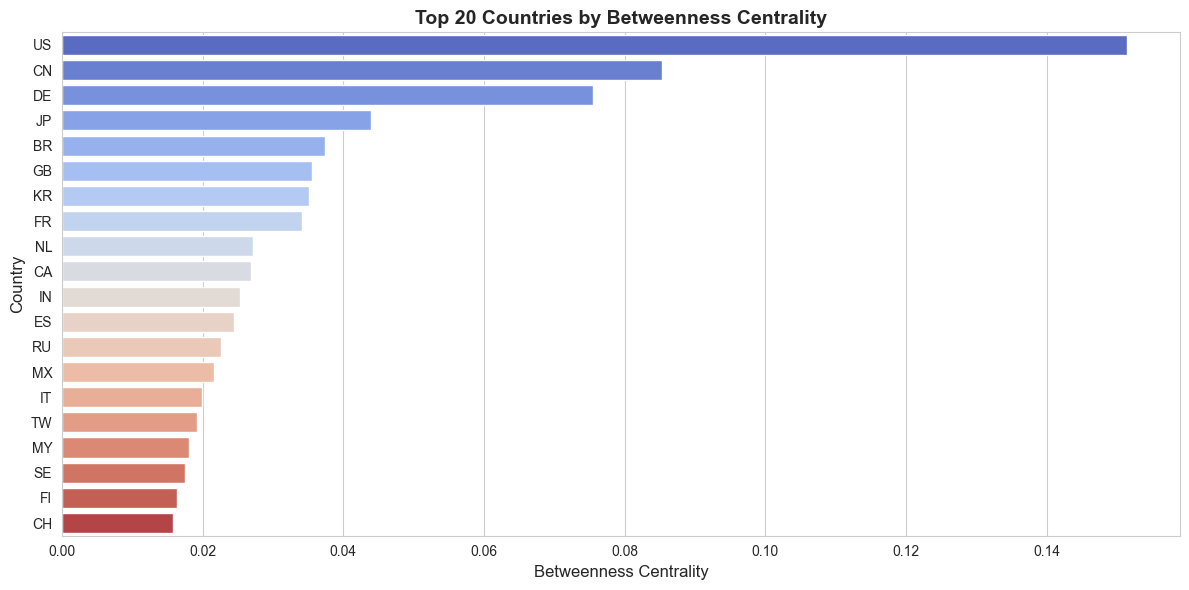

In [8]:
# Top 20 countries by Betweenness Centrality
plt.figure(figsize=(12, 6))
top_20_betweenness = centrality_df.nlargest(20, 'betweenness')
sns.barplot(data=top_20_betweenness, x='betweenness', y='country', palette='coolwarm')
plt.title('Top 20 Countries by Betweenness Centrality', fontsize=14, fontweight='bold')
plt.xlabel('Betweenness Centrality', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

### 4.3 Eigenvector Centrality

/var/folders/5_/mnr70g2511s9w_v5w224k2x00000gn/T/ipykernel_8580/234206706.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_eigenvector, x='eigenvector', y='country', palette='rocket')


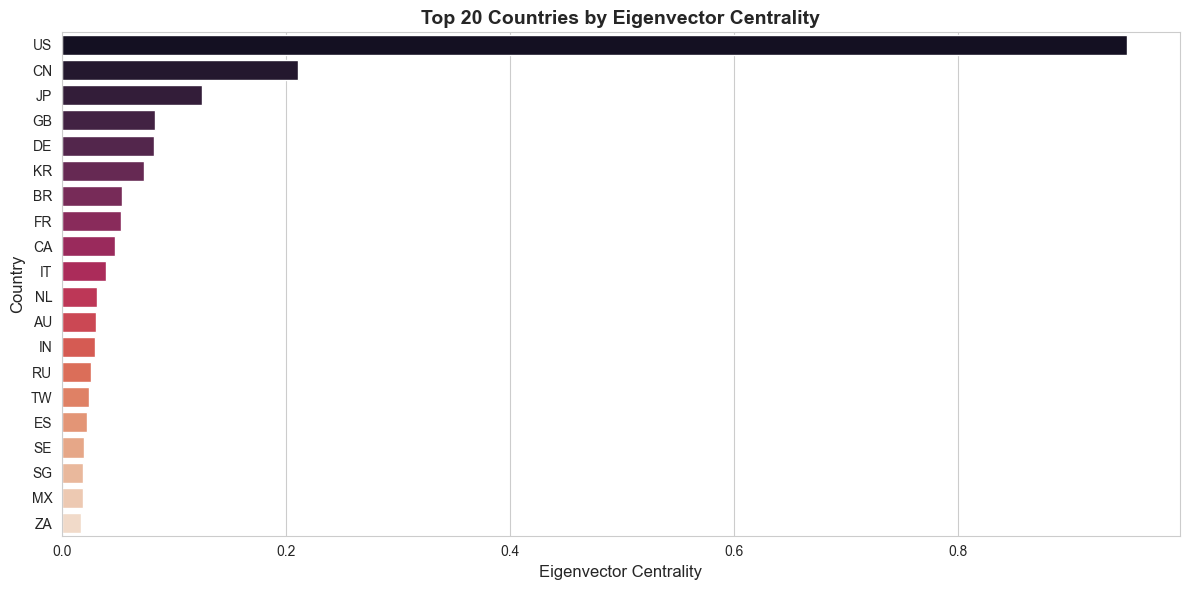

In [9]:
# Top 20 countries by Eigenvector Centrality
plt.figure(figsize=(12, 6))
top_20_eigenvector = centrality_df.nlargest(20, 'eigenvector')
sns.barplot(data=top_20_eigenvector, x='eigenvector', y='country', palette='rocket')
plt.title('Top 20 Countries by Eigenvector Centrality', fontsize=14, fontweight='bold')
plt.xlabel('Eigenvector Centrality', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

### 4.4 PageRank Centrality

/var/folders/5_/mnr70g2511s9w_v5w224k2x00000gn/T/ipykernel_8580/3851083909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_pagerank, x='pagerank', y='country', palette='mako')


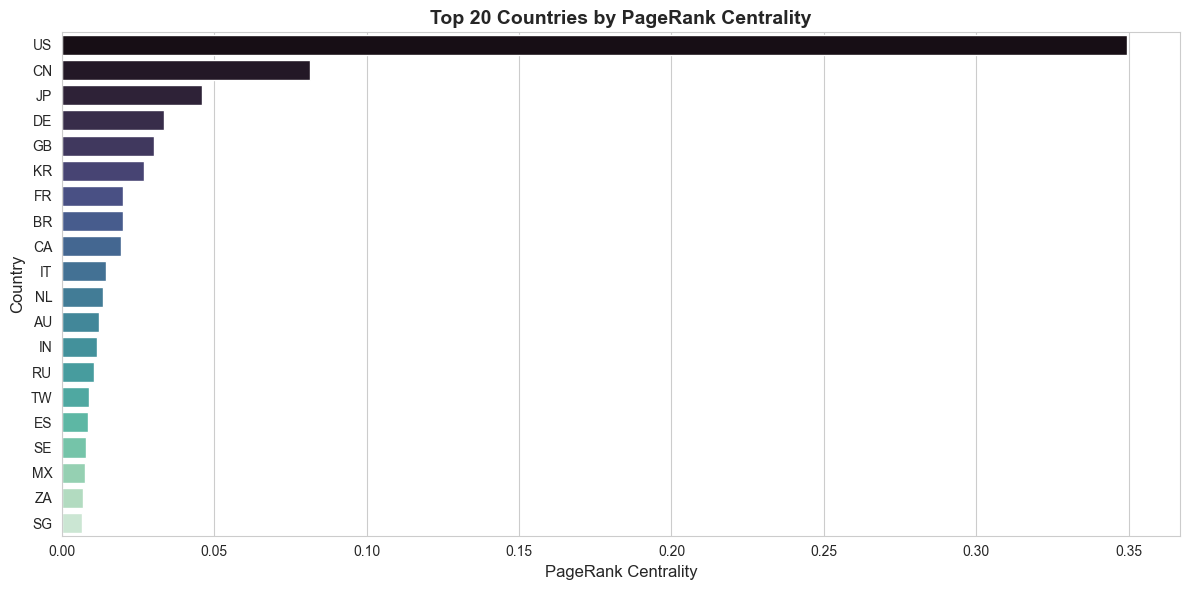

In [10]:
# Top 20 countries by PageRank Centrality
plt.figure(figsize=(12, 6))
top_20_pagerank = centrality_df.nlargest(20, 'pagerank')
sns.barplot(data=top_20_pagerank, x='pagerank', y='country', palette='mako')
plt.title('Top 20 Countries by PageRank Centrality', fontsize=14, fontweight='bold')
plt.xlabel('PageRank Centrality', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

### 4.5 Centrality Comparison Heatmap

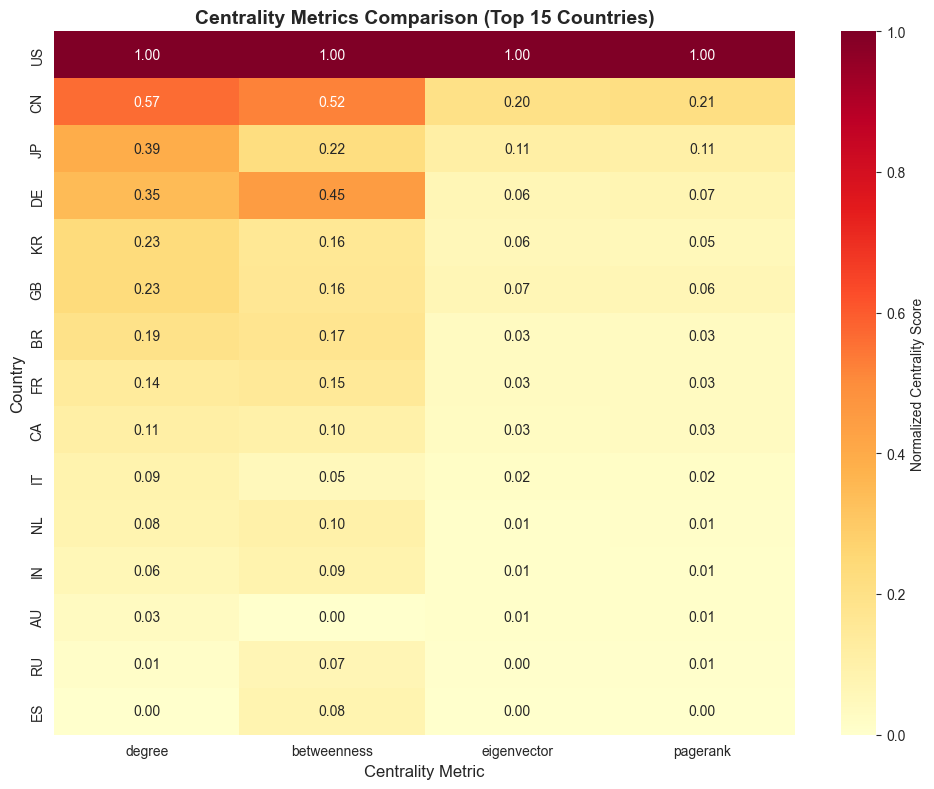

In [11]:
# Compare top 15 countries across all centrality metrics
top_15_overall = centrality_df.nlargest(15, 'degree')
heatmap_data = top_15_overall.set_index('country')[['degree', 'betweenness', 'eigenvector', 'pagerank']]

# Normalize for better comparison
heatmap_data_norm = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_norm, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Normalized Centrality Score'})
plt.title('Centrality Metrics Comparison (Top 15 Countries)', fontsize=14, fontweight='bold')
plt.xlabel('Centrality Metric', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()